<a href="https://colab.research.google.com/github/WihangaChethiya/ML_Projects/blob/main/Build_a_Deep_CNN_Image_Classifier_with_ANY_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/jztwpsIzEGc?si=2tKZKQ3NhaODceaF

In [1]:
# Install Dependencies and Setup
import tensorflow as tf
import os

import cv2
import imghdr # Check the image extention

from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_dir = '/content/drive/MyDrive/Nicholas_Projects/Data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
# Every single image in sub folder
# os.listdir(data_dir)
os.listdir(os.path.join(data_dir,'Happy'))

In [4]:
for image_class in os.listdir(data_dir):
    print(image_class)

Happy
Sad


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

In [6]:
img = cv2.imread(os.path.join(data_dir, 'Happy', '_happy_jumping_on_beach-40815.jpg')) # Gives Numpy array
img.shape

(800, 1528, 3)

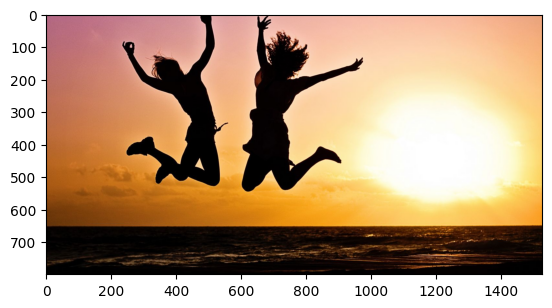

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Load DATA**

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
# deafult batch size 32

Found 294 files belonging to 2 classes.


In [10]:
# data walata acsess krnw
data_iterator = data.as_numpy_iterator()
data_iterator

In [11]:
# data walata acsess krl mewge thani ewtt acsess krnw wge idea ekak
batch = data_iterator.next()

In [12]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [13]:
# SAD = 1
# Happy = 0
batch[1] # labels

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

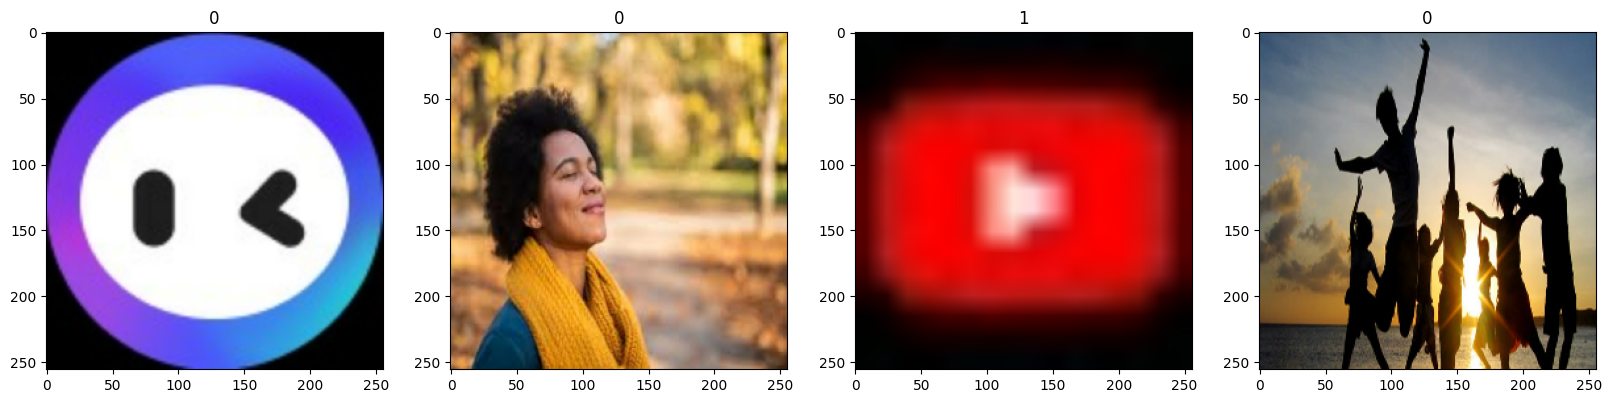

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprossesing Data

**Scale Data**

In [15]:
data = data.map(lambda x,y: (x/255, y)) # In batch we have

In [16]:
scaling_iterator = data.as_numpy_iterator()
scaling_iterator.next()[0].min()

0.0

**Split Data**

In [17]:
len(data) # Batch size

10

In [18]:
train_size = int(len(data)*.7) # Batch size eka wge kee gunykd
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
test_size + val_size + train_size == len(data)

True

In [20]:
train = data.take(train_size)
val  = data.skip(train_size).take(val_size) # Skip training data and allocte remain to val
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential # Sequentiol --> one data input and one output and data flow upto bottom
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # Layers

# Dense - Fully Connected Layer

In [22]:
model =Sequential()

In [23]:
# Addning Convolution layer and pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # Tensor flow magin defalut shape krnne 256*256*3
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [26]:
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 455ms/step - loss: 0.8527 - accuracy: 0.6429 - val_loss: 0.6368 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 5s 441ms/step - loss: 0.6173 - accuracy: 0.6429 - val_loss: 0.6232 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 9s 923ms/step - loss: 0.5602 - accuracy: 0.7009 - val_loss: 0.5218 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 5s 445ms/step - loss: 0.5565 - accuracy: 0.6964 - val_loss: 0.5577 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 8s 916ms/step - loss: 0.5286 - accuracy: 0.7321 - val_loss: 0.5066 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 5s 441ms/step - loss: 0.4537 - accuracy: 0.8571 - val_loss: 0.3865 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 8s 904ms/step - loss: 0.4113 - accuracy: 0.8036 - val_loss: 0.4379 - val_accuracy: 0.8125
Epoch 8/20
7/7 [===

In [30]:
hist.history

{'loss': [0.8526827096939087,
  0.6172708868980408,
  0.5601513981819153,
  0.5565230250358582,
  0.5285803079605103,
  0.4537356197834015,
  0.4112913906574249,
  0.34296348690986633,
  0.3088347315788269,
  0.29730409383773804,
  0.26275816559791565,
  0.2167081981897354,
  0.2017916738986969,
  0.18748818337917328,
  0.15163655579090118,
  0.13494837284088135,
  0.15541993081569672,
  0.1200060173869133,
  0.11018257588148117,
  0.09292689710855484],
 'accuracy': [0.6428571343421936,
  0.6428571343421936,
  0.7008928656578064,
  0.6964285969734192,
  0.7321428656578064,
  0.8571428656578064,
  0.8035714030265808,
  0.8705357313156128,
  0.8839285969734192,
  0.8794642686843872,
  0.8883928656578064,
  0.9241071343421936,
  0.9241071343421936,
  0.9464285969734192,
  0.9598214030265808,
  0.9375,
  0.9419642686843872,
  0.9642857313156128,
  0.9598214030265808,
  0.9732142686843872],
 'val_loss': [0.6367539167404175,
  0.6231547594070435,
  0.5217565298080444,
  0.557735800743103,
  

## Plot Performence

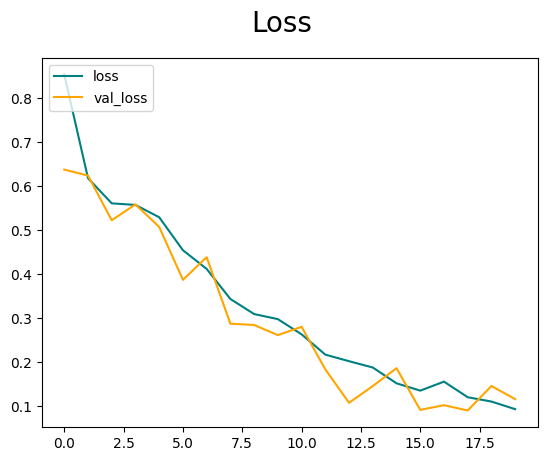

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

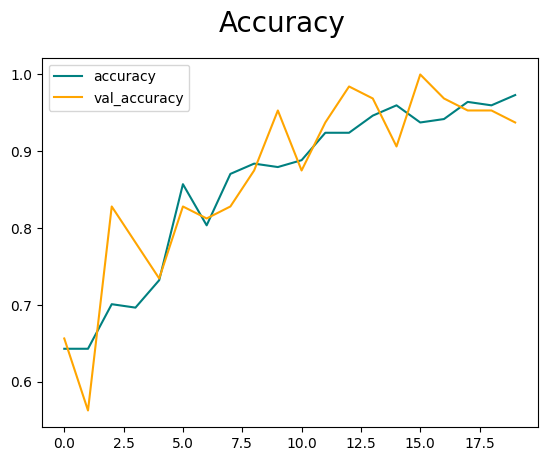

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performence

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re  = Recall()
acc = BinaryAccuracy()

In [35]:
len(test)

1

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 347ms/step


In [38]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Test

In [ ]:
img = cv2.imread()

## Save The Model

In [39]:
from tensorflow.keras.models import load_model

In [41]:
# model.save(os.path.join('data','happysadmodel.h5'))